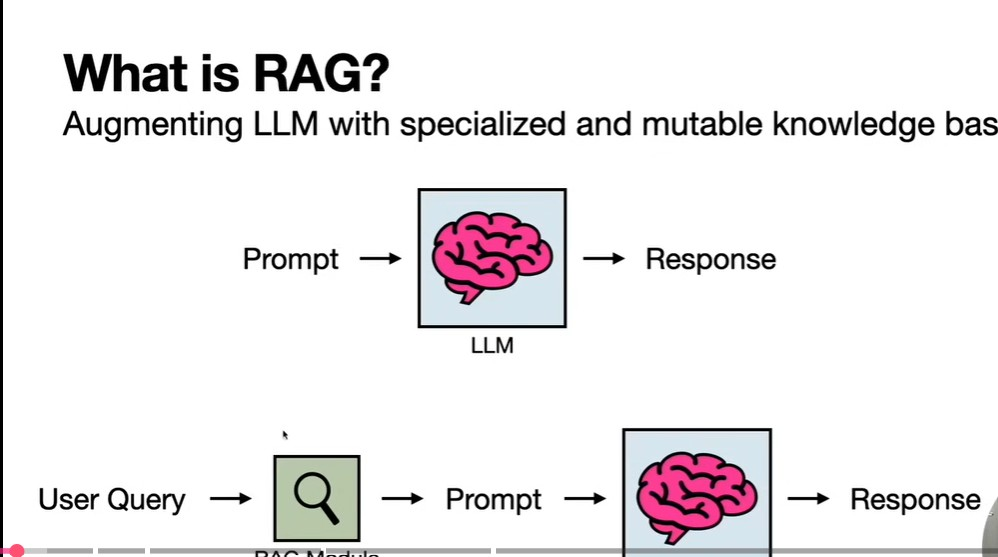

In [1]:
from PIL import Image
Image.open(r'/content/what is rag.jpg')

In [ ]:
!pip3 install llama-index
!pip3 install peft
!pip3 install optimum
!pip3 install bitsandbytes
!pip3 install auto-gptq
!pip3 install llama-index-embeddings-huggingface
!pip3 install transformers

In [ ]:
from llama_index.embeddings import
from llama_index.core import Settings,SimpleDirectoryReader,VectorStoreIndex,ServiceContext
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.postprocessor import SimilarityPostprocessor

In [ ]:
## setting up knowledge base

In [ ]:
Settings.embed_model=HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")
Settings.llm=None ## we wont use llama index to setup LLM
Setting.chunk_size=1024
Setting.chunk_overlap=20
documents=SimpleDirectoryReader(input_dir="./data").load_data()
print(len(documents))

In [ ]:
for doc in documents:
  if "Member-only-story" in doc.text:
    documents.remove(doc)
    continue
  if "The data enterpenurs" in doc.text:
    documents.remove(doc)
  if "min read" in doc.text:
    documents.remove(doc)
  print(len(documents))

In [ ]:
## retrievre

In [ ]:
## set no of documents to retrieve


In [ ]:
top_k=3
## configure retriever
retriever=VectorIndexRetriever(
    index=VectorStoreIndex.from_documents(documents),
    similarity_top_k=top_k
)

In [ ]:
## use query engine

In [ ]:
query_engine="what is the Pytorch"
response=query_engine.query(query_engine)
print(response)
# reformat response
context="Context:\n"
for i in range(top_k):
  context=context+response


In [ ]:
## Import finetuned Model

In [ ]:
from peft import PeftModel,PeftConfig


In [ ]:
instruction_string=f"""
Sai is a data scients and a ML Engineer who has good hands on content on ML and DS
"""

In [ ]:
prompt_template=lambda comment:f'''[INST]{instruction_string}\n{comment}'''
comment="what is f tailedness"
prompt=prompt_template(comment)
print(prompt)

In [ ]:
## Generate response

In [ ]:
model.eval()
inputs=tokenizer(prompt,return_tensors="pt").to("cuda")
outputs=model.generate(input_ids=inpt_ids["input_ids"].to("cuda"),max_new_tokens=280)
print(tokenier.decode(outputs[0],skip_special_tokens=True))

In [ ]:
prompt_template=lambda context, comment:f"""
It reacts to the feedback abruptly
{context}
Please respond to the following context above if it is helpful
{comment}
[/INST]
"""

In [ ]:
## Text Embeddings(semantic search) and classification